In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math

In [2]:
# importin the diabetes data set for my model
X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)
# we can then split and do train test for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = pd.DataFrame(X_train)

In [3]:
#let me  Create a model using linear regression algorithm
lin_model = LinearRegression()
lin_model

LinearRegression()

##Train test of the model

In [4]:
#let me do the train test for the model
lin_model.fit(X_train, y_train)

LinearRegression()

# we can get the coefficient and intercepts of the linear model

In [5]:
w1, w2, w3, w4, w5, w6, w7, w8, w9, w10 = lin_model.coef_
w0 = lin_model.intercept_
print("lin_model regression equation coefficients are: ", [w1, w2, w3, w4, w5, w6, w7, w8, w9, w10])
print("lin_model regression equation intercept is: ", w0)

lin_model regression equation coefficients are:  [0.13768781500241356, -23.064467722824926, 5.8463626514903035, 1.1970925183253565, -1.2816847398758906, 0.8111520257425795, 0.6016531873240526, 10.159539165455614, 67.10896239682862, 0.2015990666984866]
lin_model regression equation intercept is:  -341.3782363335058


## Predict the train and test values of the model using the lin_model regression line

In [6]:
# prictuion of x and y model
y_pred_lin_train= lin_model.predict(X_train)
y_pred_lin_test =lin_model.predict(X_test)

## question 3 to run a ploynomial of second degree

In [7]:
#make use of the polnomial feature that have imported at the begging 
poly_features=PolynomialFeatures(degree=2,include_bias=False, interaction_only=False)
X_train_poly=poly_features.fit_transform(X_train)
X_test_poly=poly_features.fit_transform(X_test)
X_test_poly.shape
poly_model=LinearRegression()
poly_model.fit(X_train_poly,y_train)

LinearRegression()

##FINDING COEFFICIENT AND THE INTERCEPTS

In [8]:
a=poly_model.coef_
b=poly_model.intercept_
print("print the coefficient",a)
print("print the intercept",b)

print the coefficient [-9.58870948e+00 -1.12365887e+01 -1.97034162e+01  1.06379230e+01
 -1.65861249e+01  2.61365196e+01  1.11310664e+01 -1.60285455e+02
 -1.76867225e+03 -1.38219346e+01  3.15406146e-02  5.27927859e-01
 -5.05251654e-02  8.27864414e-03 -4.69221125e-03 -4.11958227e-02
  7.90051404e-02  1.31330339e+00  4.05782665e-01  1.29086977e-02
 -3.37097661e+01  3.56392866e-01  4.11635640e-01  2.10945698e-01
  2.46979126e-01 -1.23858285e+00 -2.67405149e+01  1.85205406e+01
  2.71714002e-01  9.30386694e-02  1.24233391e-01 -9.12925112e-02
  1.23145042e-01 -8.38998326e-03 -1.42557179e+00  3.63090460e+00
  2.11743234e-02 -3.04122515e-03  9.44206880e-02 -7.89080772e-02
 -1.05037131e-01 -1.77369257e-01 -2.47742390e+00 -4.70871259e-02
  1.76808663e-01 -2.77391465e-01 -3.11818052e-01 -1.28145919e+00
 -5.05386041e+00 -4.46697115e-02  1.11992817e-01  1.98609397e-01
  3.73559356e-01  3.37682457e+00  2.68468399e-02  1.49596869e-01
  2.19722165e+00  4.45625595e+00  1.18907975e-01  1.63126546e+01
  1

In [9]:
poly_features.get_feature_names_out()

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'age^2', 'age sex', 'age bmi', 'age bp', 'age s1', 'age s2',
       'age s3', 'age s4', 'age s5', 'age s6', 'sex^2', 'sex bmi',
       'sex bp', 'sex s1', 'sex s2', 'sex s3', 'sex s4', 'sex s5',
       'sex s6', 'bmi^2', 'bmi bp', 'bmi s1', 'bmi s2', 'bmi s3',
       'bmi s4', 'bmi s5', 'bmi s6', 'bp^2', 'bp s1', 'bp s2', 'bp s3',
       'bp s4', 'bp s5', 'bp s6', 's1^2', 's1 s2', 's1 s3', 's1 s4',
       's1 s5', 's1 s6', 's2^2', 's2 s3', 's2 s4', 's2 s5', 's2 s6',
       's3^2', 's3 s4', 's3 s5', 's3 s6', 's4^2', 's4 s5', 's4 s6',
       's5^2', 's5 s6', 's6^2'], dtype=object)

In [10]:
y_pred_poly_train=poly_model.predict(X_train_poly)
y_pred_poly_test=poly_model.predict(X_test_poly)

## Use MAE to evaluate the model

In [11]:
def model_estimation(model, y_train, y_test, y_pred_train, y_pred_test):
    """
    Evaluate the model using MAE. 
    Inputs:
        model: the model to be evaluated
        y_train: true values of y to be use for the train dataset
        y_test: true values of y  to be use for the test dataset
        y_pred_train: the predicted for the train dataset
        y_pred_test: the predicted for the test dataset
    Returns:
        None. 
        Print the model equation as well as the MAE for the train and test datasets.
        A histogram of the percentage error and plots of the residuals and percentage error.
    """
    # create three subplots in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y_{test} - y_{pred}) / y_{test})$')
    ax1.set_title('Residuals')
    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax2.set_title('Percentage error (%)')
    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')

    print(f'Test Dataset: Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(f'Train Dataset: Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')

    # print the equation
    print('y = ', end='')
    for i, coef in enumerate(model.coef_):
        print(f'{coef:.2f} * x_{i} + ', end='')
    print(f'{model.intercept_:.2f}')
    fig.tight_layout()

Test Dataset: Mean Absolute Error: 42.79
Train Dataset: Mean Absolute Error: 43.48
y = 0.14 * x_0 + -23.06 * x_1 + 5.85 * x_2 + 1.20 * x_3 + -1.28 * x_4 + 0.81 * x_5 + 0.60 * x_6 + 10.16 * x_7 + 67.11 * x_8 + 0.20 * x_9 + -341.38


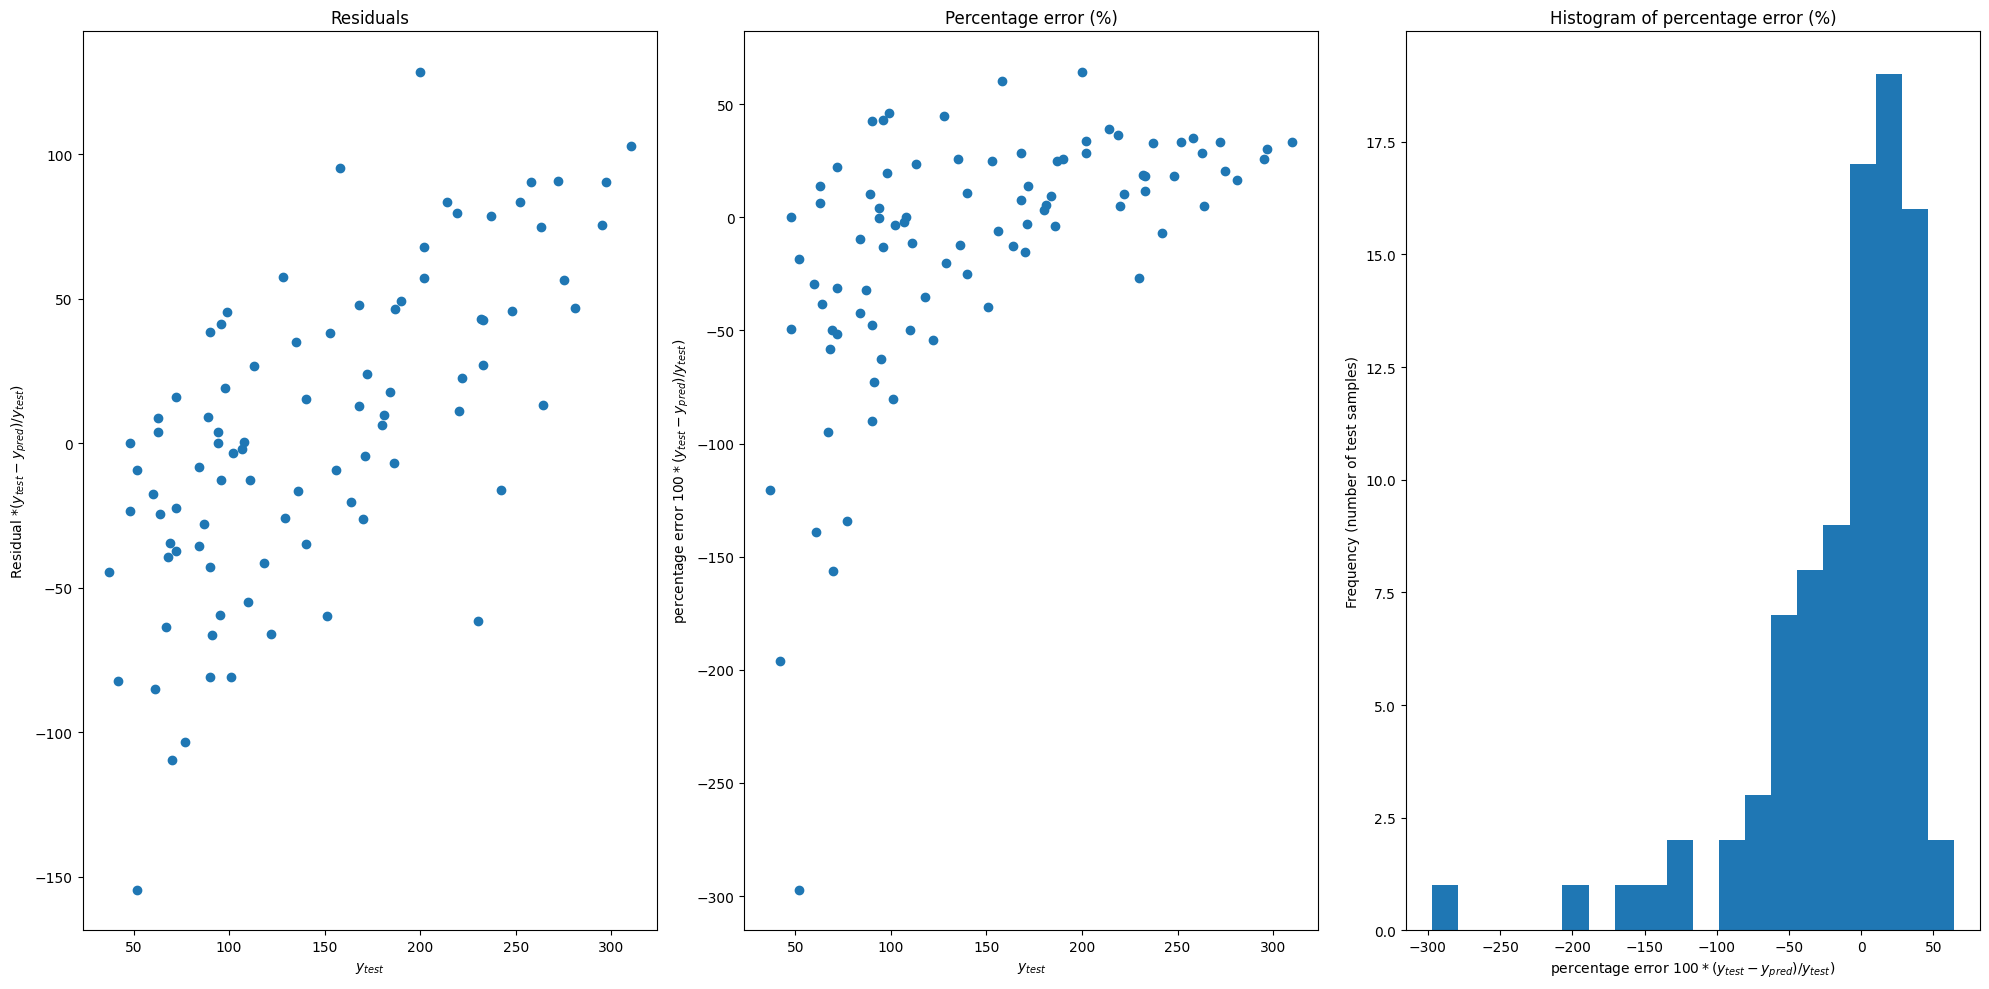

In [12]:
model_estimation(lin_model, y_train, y_test, y_pred_lin_train, y_pred_lin_test)

### Poly_model evaluation using the two mentioned function's MAE and MAPE

Test Dataset: Mean Absolute Error: 43.58
Train Dataset: Mean Absolute Error: 39.14
y = -9.59 * x_0 + -11.24 * x_1 + -19.70 * x_2 + 10.64 * x_3 + -16.59 * x_4 + 26.14 * x_5 + 11.13 * x_6 + -160.29 * x_7 + -1768.67 * x_8 + -13.82 * x_9 + 0.03 * x_10 + 0.53 * x_11 + -0.05 * x_12 + 0.01 * x_13 + -0.00 * x_14 + -0.04 * x_15 + 0.08 * x_16 + 1.31 * x_17 + 0.41 * x_18 + 0.01 * x_19 + -33.71 * x_20 + 0.36 * x_21 + 0.41 * x_22 + 0.21 * x_23 + 0.25 * x_24 + -1.24 * x_25 + -26.74 * x_26 + 18.52 * x_27 + 0.27 * x_28 + 0.09 * x_29 + 0.12 * x_30 + -0.09 * x_31 + 0.12 * x_32 + -0.01 * x_33 + -1.43 * x_34 + 3.63 * x_35 + 0.02 * x_36 + -0.00 * x_37 + 0.09 * x_38 + -0.08 * x_39 + -0.11 * x_40 + -0.18 * x_41 + -2.48 * x_42 + -0.05 * x_43 + 0.18 * x_44 + -0.28 * x_45 + -0.31 * x_46 + -1.28 * x_47 + -5.05 * x_48 + -0.04 * x_49 + 0.11 * x_50 + 0.20 * x_51 + 0.37 * x_52 + 3.38 * x_53 + 0.03 * x_54 + 0.15 * x_55 + 2.20 * x_56 + 4.46 * x_57 + 0.12 * x_58 + 16.31 * x_59 + 15.19 * x_60 + 0.86 * x_61 + 273.67 * x_

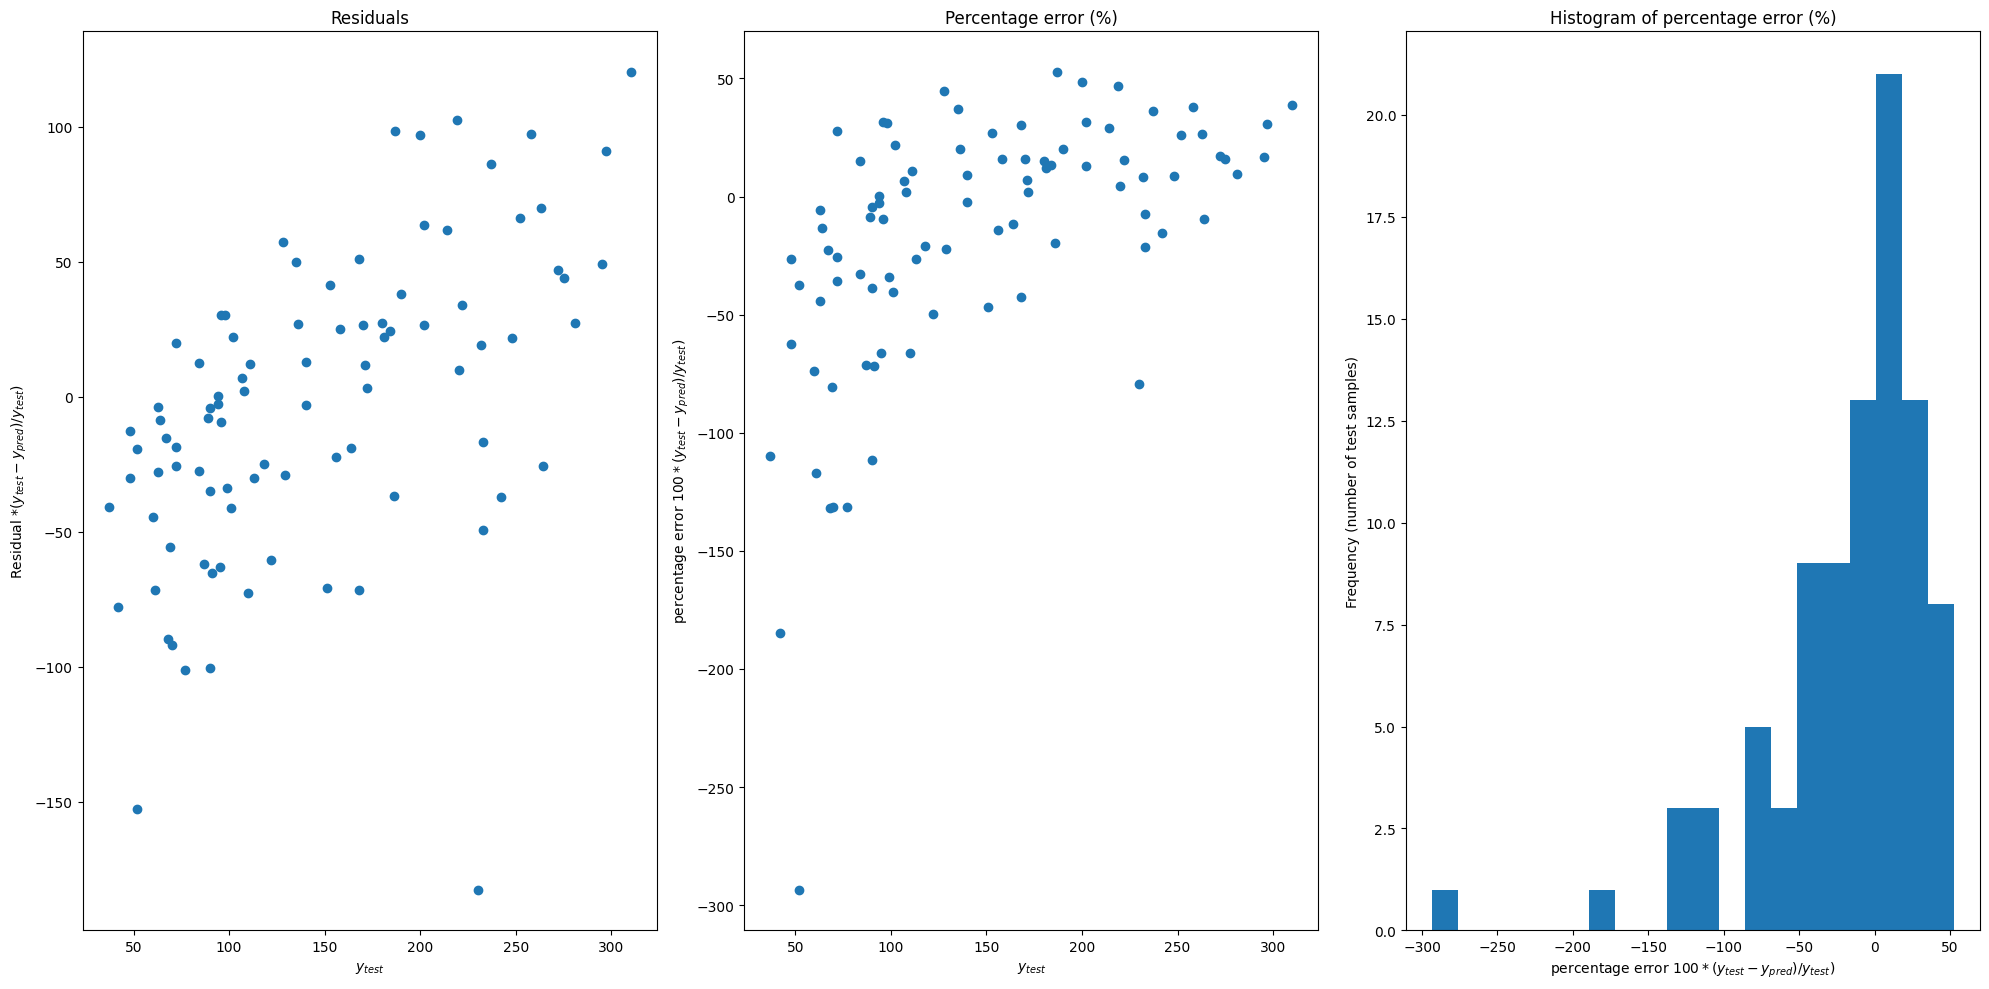

In [13]:
model_estimation(poly_model, y_train, y_test, y_pred_poly_train, y_pred_poly_test)

### We fitted "X_train" into the linear regression model (lin_model) and "X_train_poly" into the polynomial regression model (poly_model) in the previous model development step. Below is an illustration of the shapes of various independent training datasets.

In [14]:
X_train_poly.shape

(353, 65)

In [15]:
X_train.shape

(353, 10)

## question two

In [16]:
#the matrice form are the following
poly_features.get_feature_names_out()


array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'age^2', 'age sex', 'age bmi', 'age bp', 'age s1', 'age s2',
       'age s3', 'age s4', 'age s5', 'age s6', 'sex^2', 'sex bmi',
       'sex bp', 'sex s1', 'sex s2', 'sex s3', 'sex s4', 'sex s5',
       'sex s6', 'bmi^2', 'bmi bp', 'bmi s1', 'bmi s2', 'bmi s3',
       'bmi s4', 'bmi s5', 'bmi s6', 'bp^2', 'bp s1', 'bp s2', 'bp s3',
       'bp s4', 'bp s5', 'bp s6', 's1^2', 's1 s2', 's1 s3', 's1 s4',
       's1 s5', 's1 s6', 's2^2', 's2 s3', 's2 s4', 's2 s5', 's2 s6',
       's3^2', 's3 s4', 's3 s5', 's3 s6', 's4^2', 's4 s5', 's4 s6',
       's5^2', 's5 s6', 's6^2'], dtype=object)

## WE NEDD TO GET OUR ABSOLUTE MEAN,ROOT MEAN SQUARE AND MEAN  ERROR FOR US TO KNOW THE BEST MODEL

In [17]:
print("The mean absolute error for lin_model is: ", metrics.mean_absolute_error(y_test, y_pred_lin_test))
print("The mean square error for lin_model is: ", metrics.mean_squared_error(y_test, y_pred_lin_test))
print("The RMSE for lin_model is: ",math.sqrt(metrics.mean_squared_error(y_test, y_pred_lin_test)))
print("The mean absolue percentage error MAPE of lin_model is: ", metrics.mean_absolute_percentage_error(y_test, y_pred_lin_test))
print("The R^2 value for lin_model is: ", metrics.r2_score(y_test, y_pred_lin_test))

The mean absolute error for lin_model is:  42.79409467959994
The mean square error for lin_model is:  2900.193628493484
The RMSE for lin_model is:  53.85344583676595
The mean absolue percentage error MAPE of lin_model is:  0.37499826367561134
The R^2 value for lin_model is:  0.45260276297191904


In [18]:
# Performance metrics of poly_model for evaluation

print("The mean absolute error for poly_model is: ", metrics.mean_absolute_error(y_test, y_pred_poly_test))
print("The mean square error for poly_model is: ", metrics.mean_squared_error(y_test, y_pred_poly_test))
print("The RMSE for poly_model is: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred_poly_test)))
print("The mean absolue percentage error MAPE of poly_model is: ", metrics.mean_absolute_percentage_error(y_test, y_pred_poly_test))
print("The R^2 value for poly_model is: ", metrics.r2_score(y_test, y_pred_poly_test))

The mean absolute error for poly_model is:  43.581693253954526
The mean square error for poly_model is:  3096.0283073235605
The RMSE for poly_model is:  55.64196534382624
The mean absolue percentage error MAPE of poly_model is:  0.3828567851309078
The R^2 value for poly_model is:  0.4156399336447093


###  I will choose the linear regression model (lin_model) for deployment based on a comparison of the poly_model and lin_model performance evaluation metrics.The polynomial model (poly_model) of degree = 2 shows lower values for mean absolute error (MAE), mean square error (MSE), #root mean square error (RMSE), and mean absolute percent error (MAPE), and higher values for R2 score, despite the fact #that there is only a slight difference in performance metrics values.

#### QUESTION THREE:What insights regarding the goodness-of-fit can you draw from the graphs provided by the function below, for each of the models?


### The graphs of the lin_model and poly_model show that the residuals are more spreadout around zero, but low value y_test points have more residuals below zero and in a positive linear trend, the residuals shifted above zero value for high value y_test data. This results in a downward tilt in the prediction line. The percentage error plot shows that the number of residuals towards the negative percentage error axis is increasing, leading to a negative percentage error. Comparison between lin_model and poly_model graphs shows that the residuals are symmetrically distributed around zero with some skewed distribution towards the left hand side. Both models follow a normal distribution around zero, but lin_model has more points swarmed around zero than poly_model. I will suggests that linear regression model goodness-of-fit characteristics are slightly better compared to polynomial regression model.